<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/zinc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
data = pd.read_csv('/content/zinc.csv')
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))


             nAcid        ALogP       ALogp2          AMR         apol  \
count  3289.000000  3289.000000  3289.000000  3289.000000  3289.000000   
mean      0.015810    -0.674722     2.018255    33.209828    39.915665   
std       0.183884     1.250392     2.843282    14.010525     9.412443   
min       0.000000    -5.579100     0.000000     0.000000    14.837965   
25%       0.000000    -1.503000     0.194657    23.510500    33.105137   
50%       0.000000    -0.634800     0.894538    32.175000    40.070688   
75%       0.000000     0.163700     2.700764    41.418200    47.002239   
max       4.000000     4.163400    31.126357    96.113100    65.675720   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  3289.000000  3289.000000  3289.000000  3289.000000  3289.000000  ...   
mean      9.175737     9.993615    33.904834    18.503801    15.401034  ...   
std       4.430335     4.763726     8.563581     4.017987     5.658307  ...   
min       0.00000

               counts
unique_values        
1.000000         1799
0.010122           18
0.009974           18
0.015414           18
0.975399           18
...               ...
0.148572            2
0.004231            2
0.160019            2
0.158262            2
0.863168            2

[1306350 rows x 1 columns]


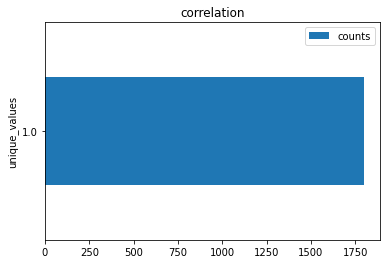

In [2]:
#correlation graph 
corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)
corr3[:1].plot(kind='barh', title='correlation')

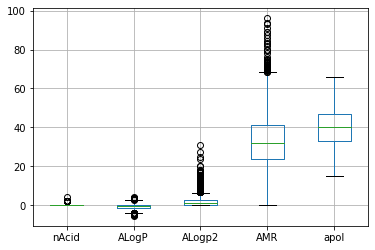

In [3]:
#some descriptor boxplots 
boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [4]:
#null values
null = data.isnull().sum().value_counts().rename_axis('unique_values').to_frame('counts')
#null.plot(kind='barh')


In [5]:
data = data.dropna(axis=1)
print(data.shape)

(3289, 1444)


In [6]:
data = data.dropna()
print(data.shape)

(3289, 1444)


In [7]:
"""
#imputer try
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

for col in data.columns:
    if np.inf in set(data[col]):
        print(col, " ", data[col].value_counts())

data = data.replace([np.inf, -np.inf], np.nan)
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)
IterativeImputer(random_state=0)
data2 = imp_mean.transform(data)
print(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Range\n", (data2.max()-data2.min()).value_counts())
"""


'\n#imputer try\nfrom sklearn.experimental import enable_iterative_imputer  # noqa\nfrom sklearn.impute import IterativeImputer\n\nfor col in data.columns:\n    if np.inf in set(data[col]):\n        print(col, " ", data[col].value_counts())\n\ndata = data.replace([np.inf, -np.inf], np.nan)\nprint(np.any(np.isnan(data)))\nprint(np.all(np.isfinite(data)))\n\nimp_mean = IterativeImputer(random_state=0)\nimp_mean.fit(data)\nIterativeImputer(random_state=0)\ndata2 = imp_mean.transform(data)\nprint(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))\nprint("Range\n", (data2.max()-data2.min()).value_counts())\n'